In [ ]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

In [45]:
library(readr)
library(ggplot2) 
library(corrplot) 
library(ggcorrplot) 
library(reshape2) 
library(dplyr)
library(tidyverse)

In [46]:
insurance <- read_csv(file = "../input/insurance.csv")

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  charges = col_double()
)


In [47]:
str(insurance)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	1338 obs. of  7 variables:
 $ age     : num  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: num  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_character(),
  ..   bmi = col_double(),
  ..   children = col_double(),
  ..   smoker = col_character(),
  ..   region = col_character(),
  ..   charges = col_double()
  .. )


In [48]:
summary(insurance)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

Using sex, smoker as id variables


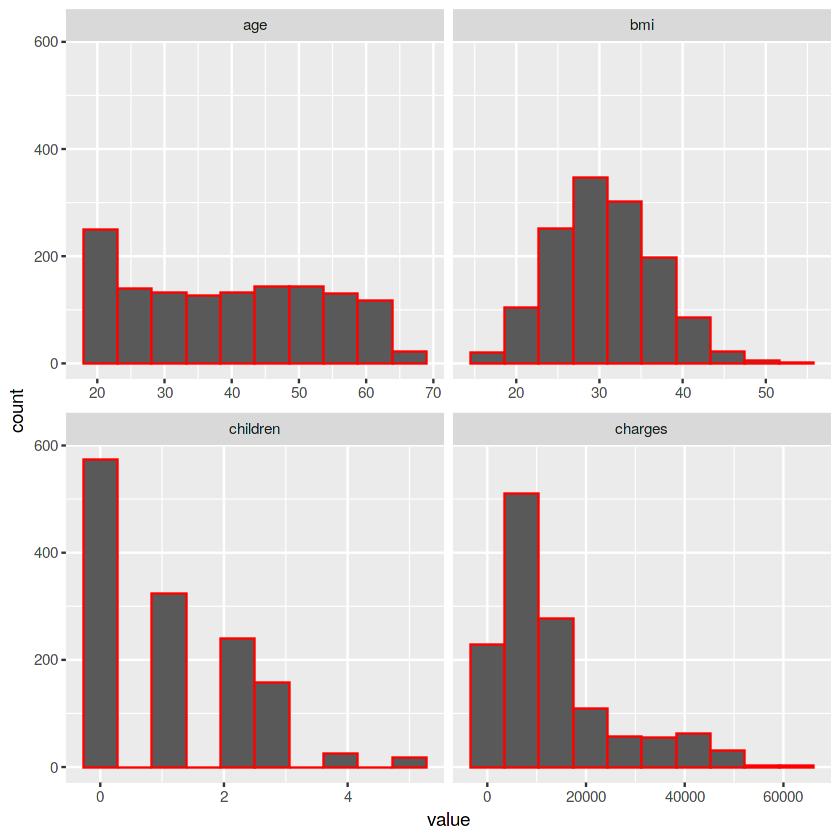

In [49]:
ggplot(data = melt(insurance[, -6]), mapping = aes(x = value)) + 
  geom_histogram(bins = 10,colour="red") + facet_wrap(~variable, scales = "free_x")

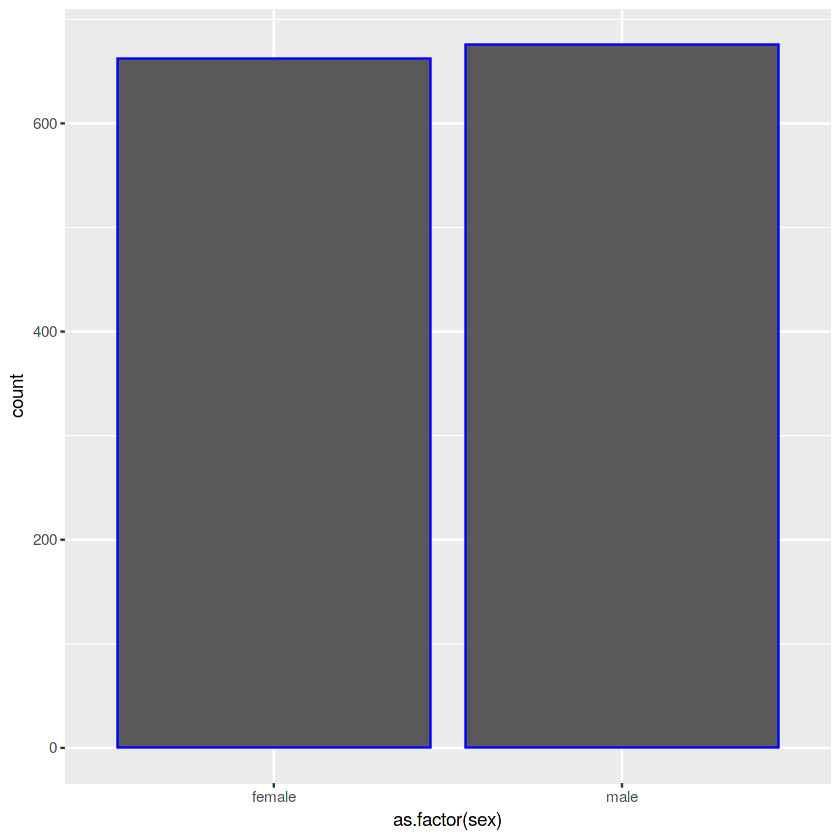

In [50]:
ggplot(insurance) +
geom_bar(mapping = aes(x = as.factor(sex)),colour="blue")

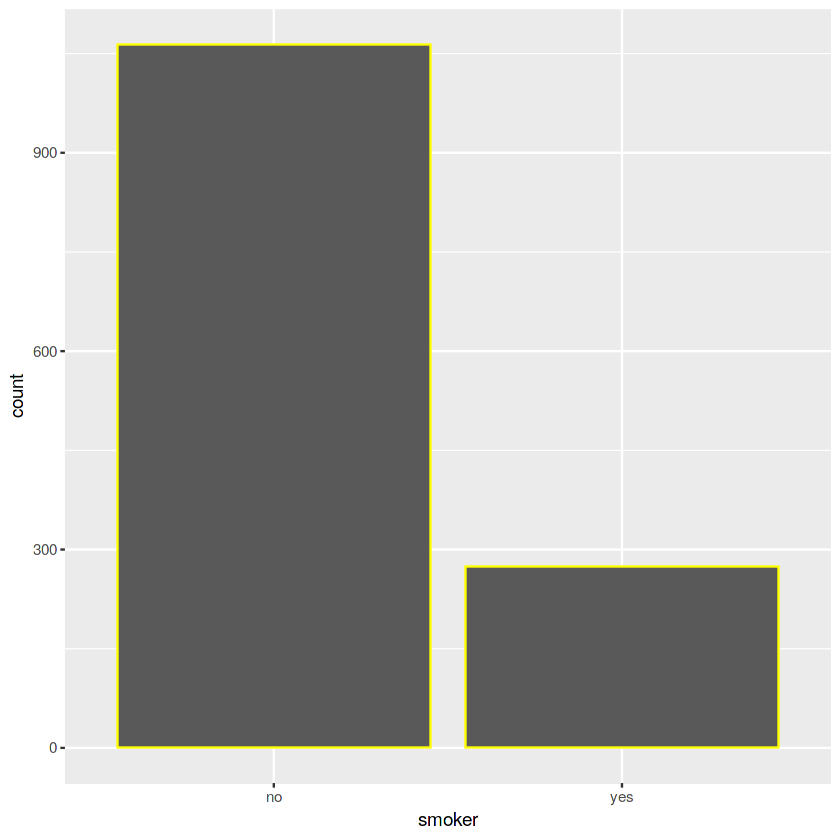

In [51]:
ggplot(insurance) + 
geom_bar(mapping = aes(x = smoker),colour="yellow")

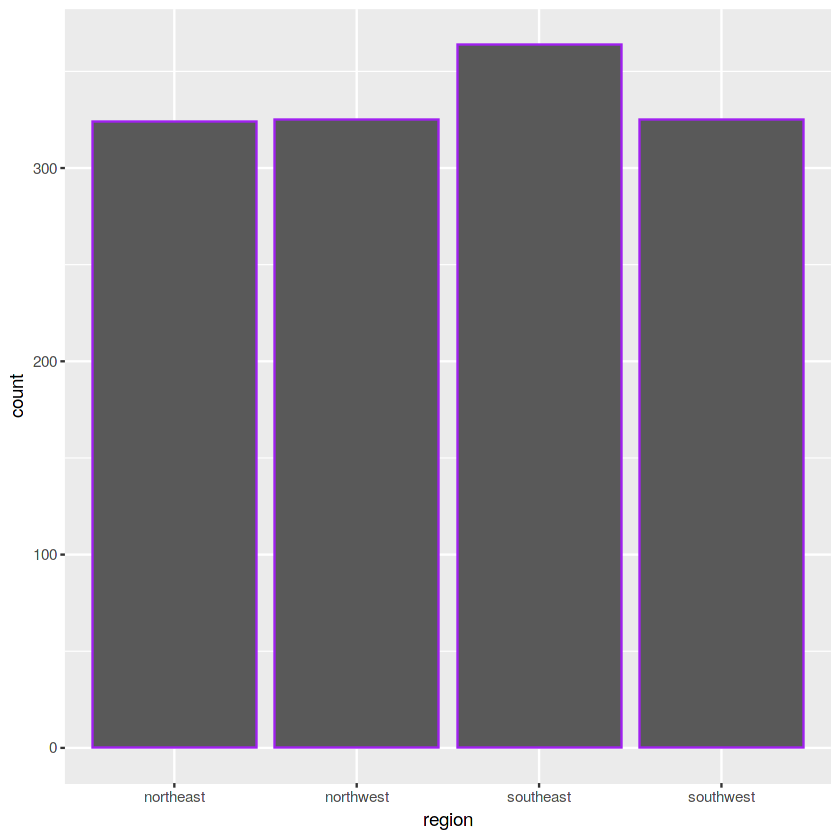

In [52]:
ggplot(data = insurance) + 
geom_bar(mapping = aes(x= region),colour="purple")

From the above, we can see that both children and charges are skewed to the right. age is approximately uniform and bmi appears to be approximately normal. There seems to be no significant discrepancies between the number males vs. females, as well as the number of observations from each region. There do appear to be roughly 750 more non-smokers than smokers. Now, let's look at how each of these variables is related to the amount of charges.

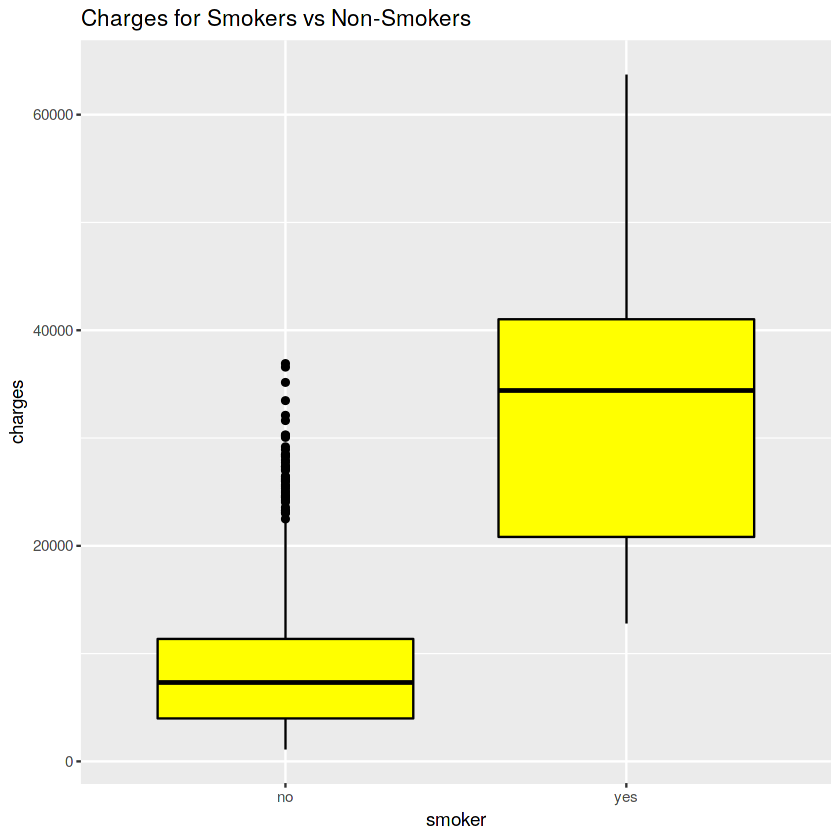

In [53]:
insurance %>%
  ggplot(aes(x=smoker, y = charges)) +
  geom_boxplot(fill = "yellow", color = "black") + #smokers associated with ~$30,000 higher mean charge amount
  ggtitle("Charges for Smokers vs Non-Smokers")

we can see that smokers are associated with roughly a $20,000 increase in the average medical charges over the course of a year

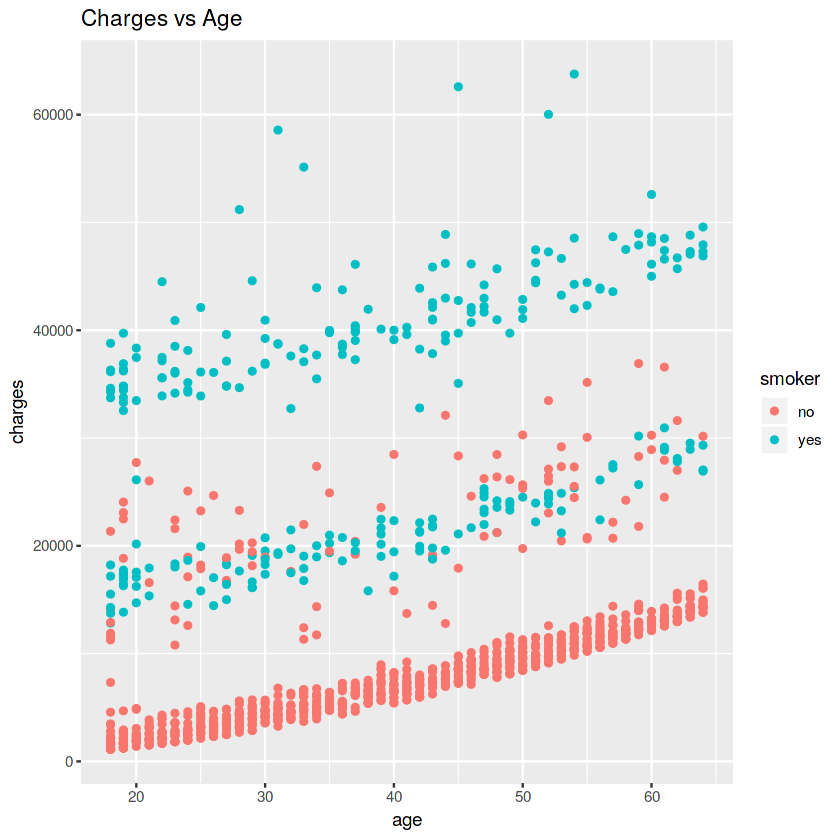

In [54]:
insurance %>%
  ggplot(aes(x=age, y = charges)) + 
  geom_point(aes(color = smoker)) + 
  ggtitle("Charges vs Age")

Here we got a clearer picture of the relationship between smoker and charges. Indeed, there appears to be four different groups: two within smokers and two within non-smokers.

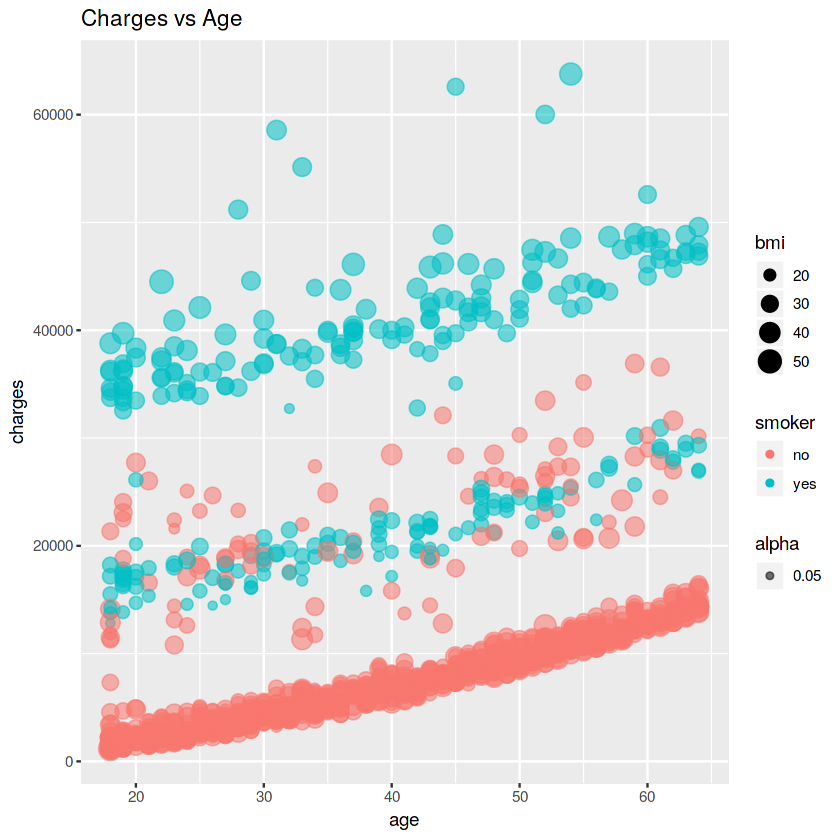

In [59]:
insurance %>%
  ggplot(aes(x=age, y = charges)) + 
  geom_point(aes(color = smoker, size = bmi, alpha = .05)) +
  ggtitle("Charges vs Age")

When we add bmi to the plot, the picture become clearer still. There appear to be four distinct groups with related charges:

high bmi, smokers
high bmi, non-smokers
low bmi, smokers
low bmi, non-smokers


$title
[1] "Charges vs Number of Children"

attr(,"class")
[1] "labels"

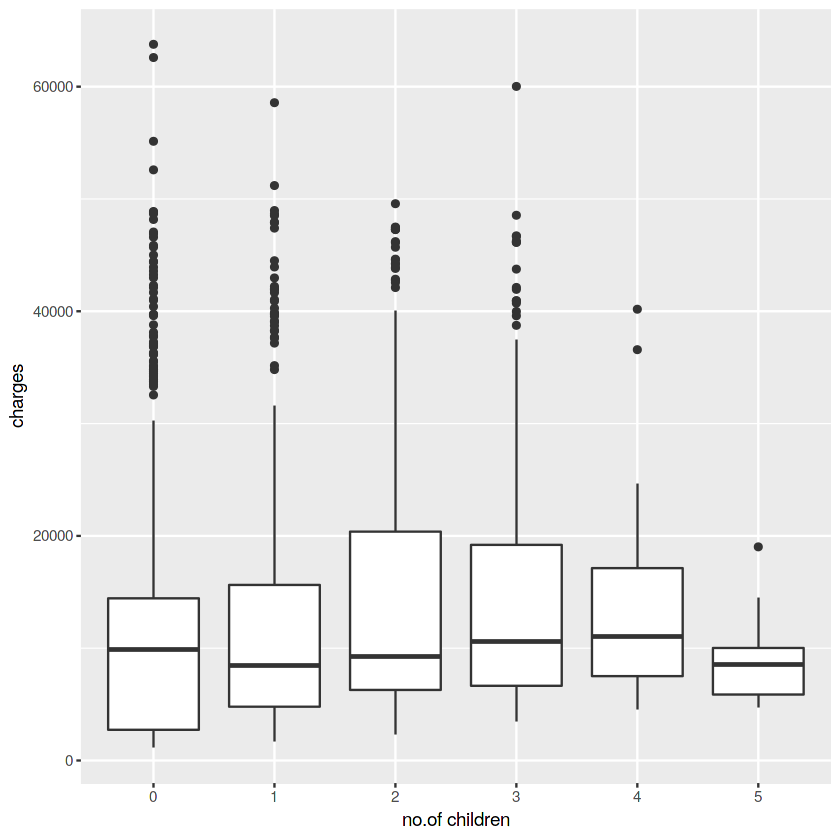

In [64]:
insurance %>%
  ggplot(aes(x=as.factor(children), y = charges)) + 
  geom_boxplot() + labs(x= "no.of children")
  ggtitle("Charges vs Number of Children")

Here the average charges don't appear to vary significantly over the number of children.

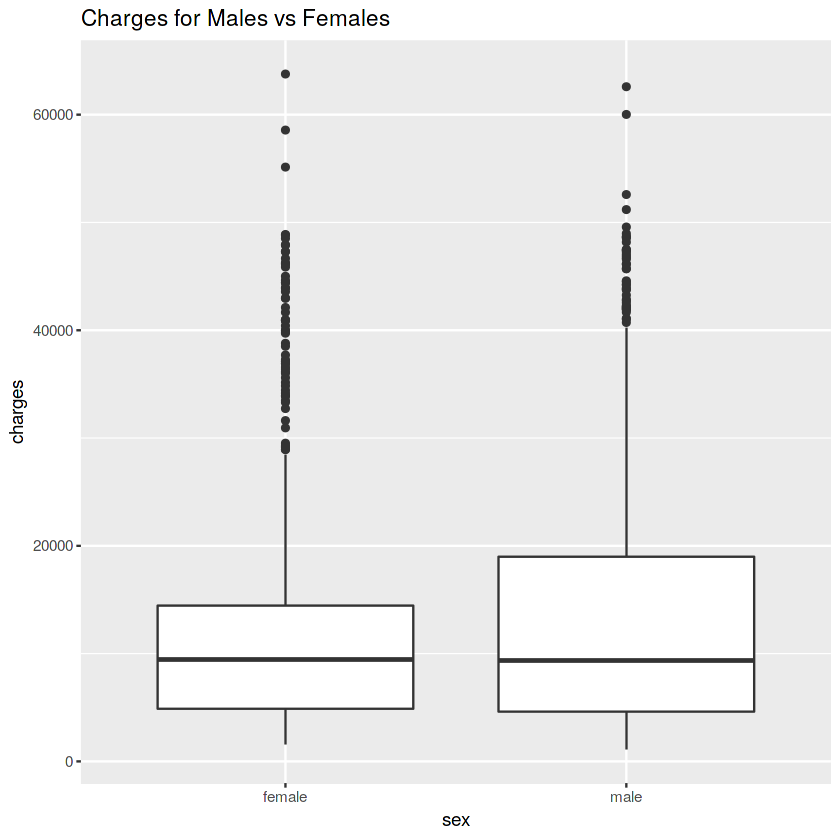

In [65]:
insurance %>%
  ggplot(aes(x= sex, y = charges)) + 
  geom_boxplot() +
  ggtitle("Charges for Males vs Females")


This shows that there appears to be no difference in the average medical costs between men and women.

Let's look at how the average medical cost varies between the four groups described above. Let's also add a feature to the dataset obese, which takes the values yes if bmi is greater than 30, and no if bmi is less than 30.

In [66]:
insurance <- insurance %>%
mutate(obese = ifelse(bmi >= 30, "yes", "no"))
head(insurance)
averageCharges <- insurance %>%
  group_by(smoker, obese) %>%
  summarise(
    count = n(),
    average_charge = mean(charges, na.rm = TRUE), 
    stdev_charge = sd(charges, na.rm = TRUE)
  )
print(averageCharges)

age,sex,bmi,children,smoker,region,charges,obese
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
19,female,27.900,0,yes,southwest,16884.924,no
18,male,33.770,1,no,southeast,1725.552,yes
28,male,33.000,3,no,southeast,4449.462,yes
33,male,22.705,0,no,northwest,21984.471,no
32,male,28.880,0,no,northwest,3866.855,no
31,female,25.740,0,no,southeast,3756.622,no


# A tibble: 4 x 5
# Groups:   smoker [2]
  smoker obese count average_charge stdev_charge
  <chr>  <chr> <int>          <dbl>        <dbl>
1 no     no      502          7977.        5839.
2 no     yes     562          8843.        6105.
3 yes    no      129         21363.        5067.
4 yes    yes     145         41558.        6031.


Supporting the graphics, we see that being obese and being a smoker increases the average charges significantly. In fact, obese smokers averaged $41,558! When we go to build our model, we may want to consider an interaction term between obese and smokers, as the two variables seem to have a synergistic effect.

Before we build our regression model, let's split the data into training and testing data, so we can observe how well our model fits "unseen" data.

In [67]:
insurance$obese <- as.factor(insurance$obese)
insurance$smoker <- as.factor(insurance$smoker)
insurance$sex <- as.factor(insurance$sex)
insurance$region <- as.factor(insurance$region)

set.seed(134) #set seed to make reproducible 
sampleSize <- floor(.75*nrow(insurance))
trainIndexes <- sample(seq_len(nrow(insurance)), sampleSize, replace = FALSE) 
train <- insurance[trainIndexes, ]
test <- insurance[-trainIndexes, ]

**Multiple Linear Regression Model**

Let's begin by fitting a full model (minus bmi, as it is essentially the same as obese), and see how well this fits our training data.


Call:
lm(formula = charges ~ . - bmi, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12618.3  -3679.4    153.1   1410.8  26388.2 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4367.36     715.02  -6.108 1.45e-09 ***
age               264.19      13.56  19.483  < 2e-16 ***
sexmale           -91.99     382.11  -0.241  0.80980    
children          439.08     158.55   2.769  0.00572 ** 
smokeryes       23578.88     472.32  49.922  < 2e-16 ***
regionnorthwest   -75.86     548.74  -0.138  0.89008    
regionsoutheast  -328.28     540.52  -0.607  0.54376    
regionsouthwest  -684.89     546.93  -1.252  0.21078    
obeseyes         4342.46     389.27  11.155  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6023 on 994 degrees of freedom
Multiple R-squared:  0.7535,	Adjusted R-squared:  0.7516 
F-statistic: 379.9 on 8 and 994 DF,  p-value: < 2.2e-16


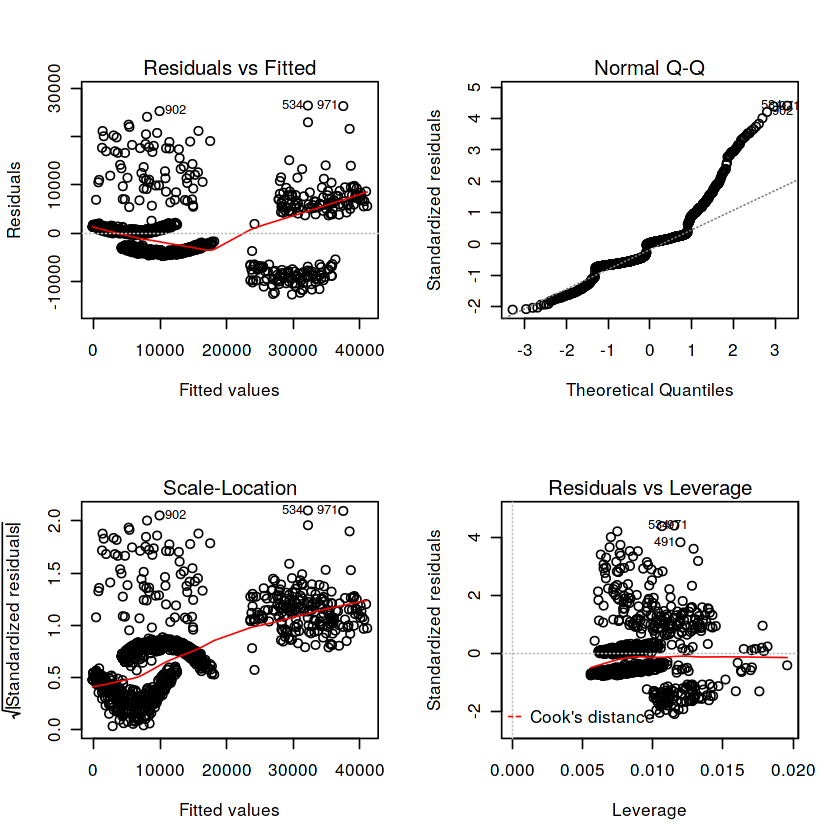

In [68]:
par(mfrow = c(2,2))
lm.fit.m.1 <- lm(charges ~ . - bmi, data = train)
summary(lm.fit.m.1)
plot(lm.fit.m.1)

Our full model appears to be a pretty decent fit. The model explains roughly 74% of the variation in the charges. The residuals do indicate some significant outliers, as apparent in the EDA at the beginning. Indeed, there are clusters in the plot of the Residuals vs Fitted values plot, which may indicate that this model is not ideal. Perhaps the clusters should be analyized individually and be given their own model. The Normal Q-Q plot also indicates that our response, charges is heavily skewed to the right, which we also saw at the beginning. We see that sex and region do not appear to be significant at all, so let's remove them.


Call:
lm(formula = charges ~ . - bmi - sex - region, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12729.8  -3664.1     81.5   1375.4  26733.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4666.99     613.31  -7.609 6.35e-14 ***
age           264.14      13.54  19.509  < 2e-16 ***
children      439.11     158.22   2.775  0.00562 ** 
smokeryes   23571.85     469.60  50.196  < 2e-16 ***
obeseyes     4305.81     382.37  11.261  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6017 on 998 degrees of freedom
Multiple R-squared:  0.7531,	Adjusted R-squared:  0.7521 
F-statistic: 760.8 on 4 and 998 DF,  p-value: < 2.2e-16


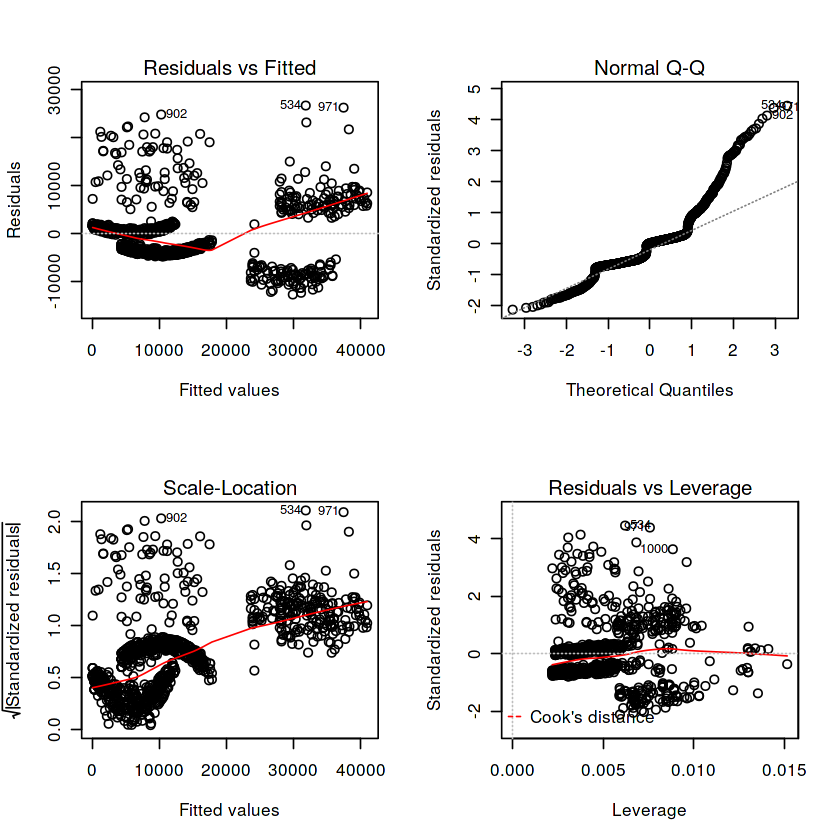

In [69]:
par(mfrow = c(2,2))
lm.fit.m.2 <- lm(charges ~ . - bmi - sex - region, data = train)
summary(lm.fit.m.2)
plot(lm.fit.m.2)

The diagnostic plots appear roughly the same - our model is still underpredicting some observations due to the outliers in the data. However, our model's R-squared fell only 0.007, while our F-statistic doubled, indicating that this simpler model is a better fit for the data. However, as I said before, it appears that there could be some interaction between smoker and obese, so let's fit a model with an interaction term between these two variables.


Call:
lm(formula = charges ~ obese * smoker + age + children, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4567.4 -1842.2 -1297.1  -575.5 24455.2 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2809.76     459.64  -6.113 1.40e-09 ***
obeseyes             173.47     318.43   0.545    0.586    
smokeryes          13267.61     501.48  26.457  < 2e-16 ***
age                  269.18      10.05  26.795  < 2e-16 ***
children             521.70     117.42   4.443 9.86e-06 ***
obeseyes:smokeryes 19921.78     697.35  28.568  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4464 on 997 degrees of freedom
Multiple R-squared:  0.8642,	Adjusted R-squared:  0.8635 
F-statistic:  1269 on 5 and 997 DF,  p-value: < 2.2e-16


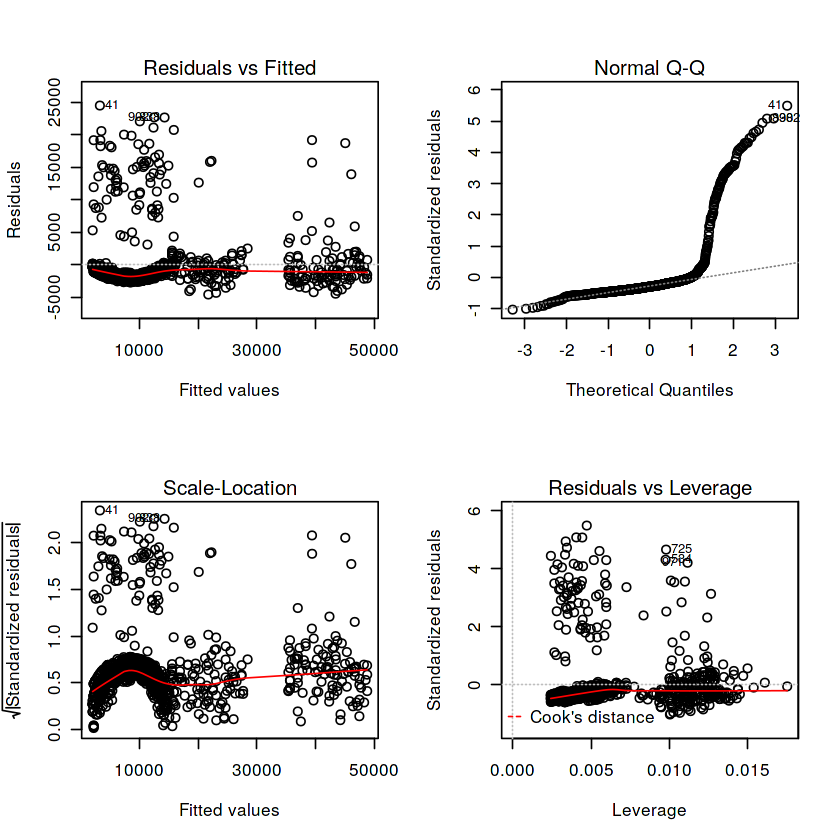

In [70]:
par(mfrow = c(2,2))
lm.fit.m.3 <- lm(charges ~ obese*smoker + age + children, data = train)
summary(lm.fit.m.3) 
plot(lm.fit.m.3)

This model appears to be a much better fit than the first two. Our R-squared has increased to .8446, and our F-Statistic increased to 1084. Our Residual vs Fitted plot appears a little better, although the Normal Q-Q plot still indicates some problems with our fit. Although obeseyes is statistically insignificant, we cannot take it out of the model due to the Hierarchy Principle. Instead, let's remove the variable with the next highest p-value, children, to see if we can make our model even simpler without losing any predicting power.


Call:
lm(formula = charges ~ obese * smoker + age, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4745.5 -1922.9 -1291.4  -394.5 24414.8 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2320.13     450.41  -5.151 3.12e-07 ***
obeseyes             214.10     321.28   0.666    0.505    
smokeryes          13291.28     506.14  26.260  < 2e-16 ***
age                  270.78      10.13  26.720  < 2e-16 ***
obeseyes:smokeryes 19845.49     703.66  28.203  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4506 on 998 degrees of freedom
Multiple R-squared:  0.8615,	Adjusted R-squared:  0.861 
F-statistic:  1552 on 4 and 998 DF,  p-value: < 2.2e-16


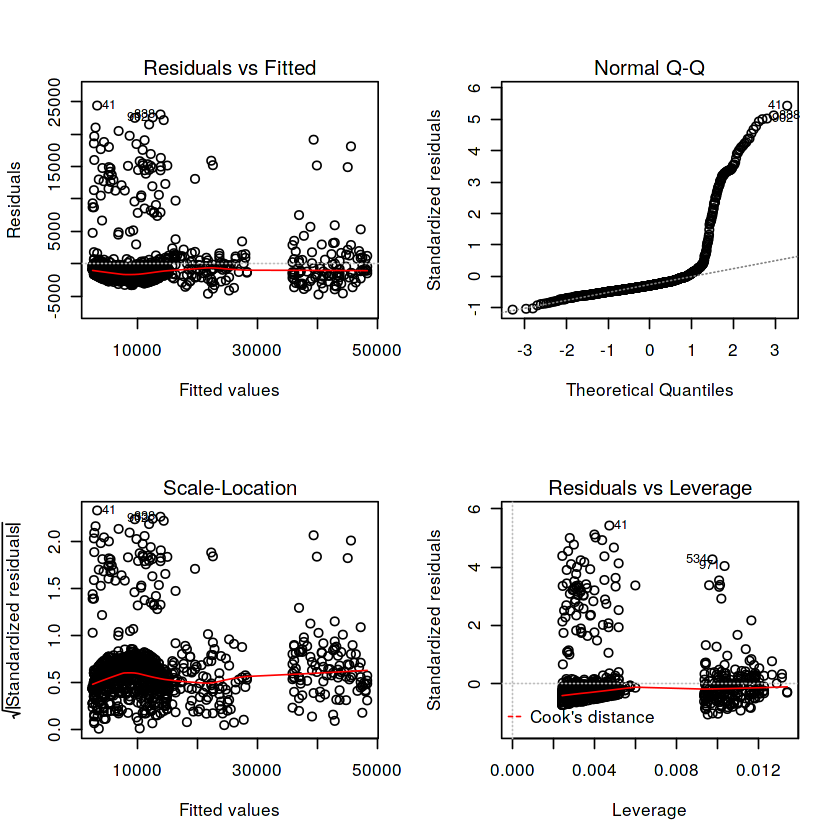

In [71]:
par(mfrow = c(2,2))
lm.fit.m.4 <- lm(charges ~ obese*smoker + age, data = train)
summary(lm.fit.m.4) 
plot(lm.fit.m.4)

In this fourth model, the R-squared dropped only .0031 without the addition of children, while the F-statistic increased to 1324. We can interpret the model coefficients as follows:

The intercept is insignificant because it is negative, which is unreasonable in this setting.
For each year increase in age, we can expect a $264.57 increase in average charges.
For a person who is an obese non-smoker, we can expect $320.24 higher charges on average.
For a person who is a non-obese smoker, we can expect $13,151.58 higher charges on average.
For a person who is an obese smoker, we can expect $320.24 + $13.151.58 + $19,574.27 = $33,046.09 higher charges on average!

**Predicting Values for Test Data**

Let's now look at how our model fits the test data.

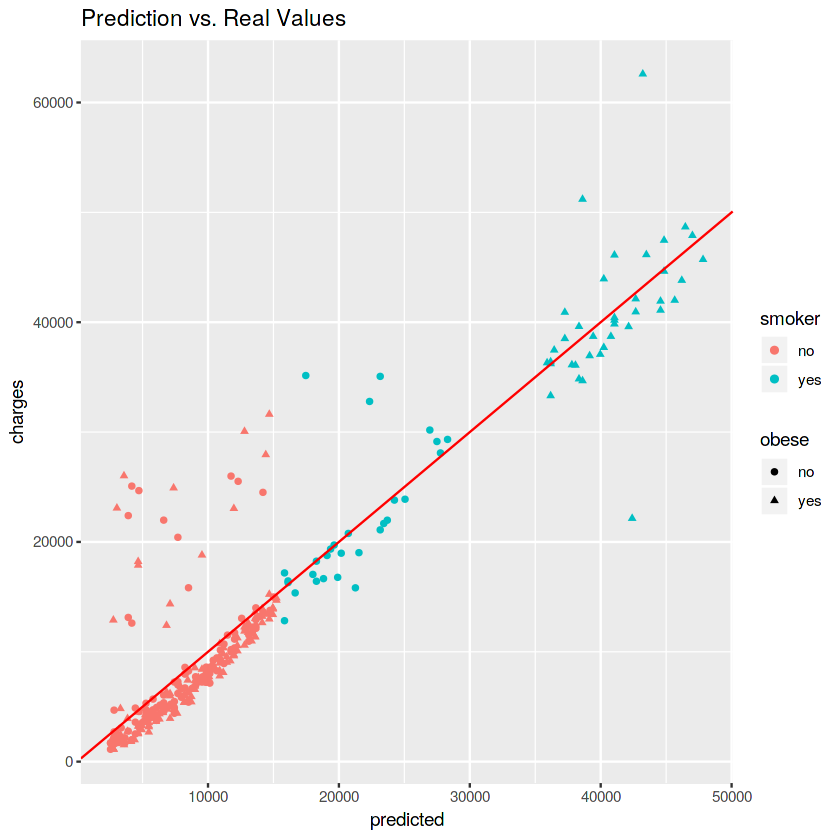

In [72]:
test$predicted <- predict(lm.fit.m.4, newdata = test)
test %>%
  ggplot() +
  geom_point(aes(x = predicted, y = charges, color = smoker, shape = obese)) +
  geom_abline(color = "red") +
  ggtitle("Prediction vs. Real Values")

The plot shows that the model is a pretty good fit for the test data. Overall, our results are pretty accurate; although, our model does have difficulty in accounting for the much higher outliers in the data. Let's look at the residuals from the predictions.

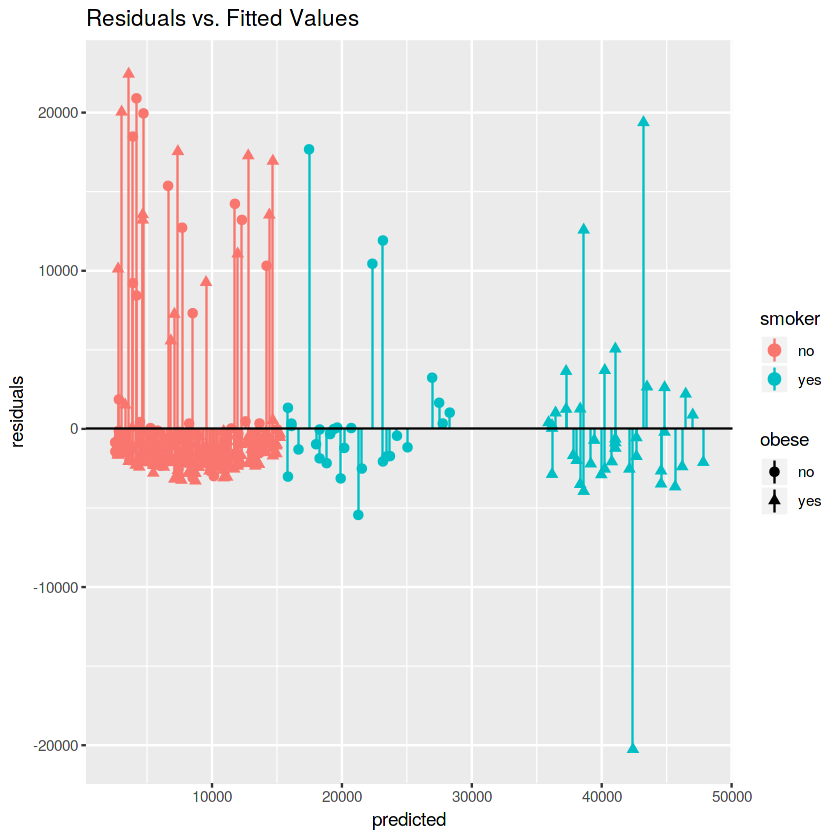

In [73]:
test$residuals <- test$charges - test$predicted

#plot residuals 
test %>%
  ggplot() +
  geom_pointrange(aes(x=predicted, y=residuals, ymin = 0, ymax = residuals, color = smoker, shape = obese)) +
  geom_hline(yintercept = 0) +
ggtitle("Residuals vs. Fitted Values")

In [ ]:
The residuals look pretty decent overall; although there are some residuals of around $20,000! It looks that the model performs the worst for non-smokers, as there are still several high residuals. Perhaps this is due to other factors not included in the dataset.
 